In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator

#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from pathlib import Path

# Helper functions
# from helper_functions import imgs_to_numpy

# Styles for miles
style.use('ggplot')

In [2]:
def GimmeImages(data_split, batch_size = 100):
    
    DATADIR = Path('data/') / 'real_vs_fake' / 'real-vs-fake' / data_split
    
    if data_split == "test":
        imgs = DirectoryIterator(DATADIR,
                             image_data_generator = ImageDataGenerator(rescale = 1./255),
                             color_mode = 'rgb', 
                             classes = ["real", "fake"],
                             target_size = (256, 256),
                             batch_size = batch_size,
                             class_mode = 'binary',
                             shuffle = False)
    else:
        imgs = DirectoryIterator(DATADIR,
                                 image_data_generator = ImageDataGenerator(rescale = 1./255,
                                                                           horizontal_flip = True,
                                                                           rotation_range = 20),
                                 color_mode = 'rgb', 
                                 classes = ["real", "fake"],
                                 target_size = (256, 256),
                                 batch_size = batch_size,
                                 class_mode = 'binary',
                                 shuffle = True)
    return imgs

In [3]:
train_imgs = GimmeImages('train')
val_imgs   = GimmeImages('valid')
test_imgs  = GimmeImages('test')

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


## Creating New Model

In [12]:
model_deepfake = keras.Sequential([
  keras.Input(shape = (256, 256, 3)),
  layers.Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(units = 256, activation = 'relu'),
  layers.Dropout(rate = 0.1),
  layers.Dense(units = 128, activation = 'relu'), 
  layers.Dense(units = 1)
])

In [13]:
#model_deepfake.compile(optimizer = 'adam', 
#                       metrics = [keras.metrics.BinaryAccuracy(), 
#                                  keras.metrics.Precision(), 
#                                  keras.metrics.Recall()],
#                       loss = keras.losses.BinaryCrossentropy(from_logits = True,
#                                                              name = 'binary_crossentropy'))

In [14]:
model_deepfake.compile(optimizer = 'adam', 
                       metrics = [keras.metrics.BinaryAccuracy()],
                       loss = keras.losses.BinaryCrossentropy(from_logits = True,
                                                              name = 'binary_crossentropy'))

In [15]:
model_deepfake.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [35]:
model_fit = model_deepfake.fit(train_imgs,
                               epochs = 5,
                               validation_data = val_imgs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 200 steps
Epoch 1/5
1000/1000 [==============================] - 1599s 2s/step - loss: 0.5627 - binary_accuracy: 0.6880 - val_loss: 0.4966 - val_binary_accuracy: 0.7301
Epoch 2/5
1000/1000 [==============================] - 1584s 2s/step - loss: 0.4260 - binary_accuracy: 0.7939 - val_loss: 0.4131 - val_binary_accuracy: 0.8105
Epoch 3/5
1000/1000 [==============================] - 1620s 2s/step - loss: 0.3496 - binary_accuracy: 0.8400 - val_loss: 0.3341 - val_binary_accuracy: 0.8389
Epoch 4/5
1000/1000 [==============================] - 1579s 2s/step - loss: 0.3002 - binary_accuracy: 0.8661 - val_loss: 0.2940 - val_binary_accuracy: 0.8738
Epoch 5/5
1000/1000 [==============================] - 1587s 2s/step - loss: 0.2590 - binary_accuracy: 0.8875 - val_loss: 0.2586 - val_binary_accuracy: 0.8794


In [26]:
model_deepfake.save('deepFakeModel1')

INFO:tensorflow:Assets written to: deepFakeModel1/assets


## Retraining Model

In [11]:
model = keras.models.load_model('deepFakeModel1')

In [5]:
model.fit(train_imgs,
          epochs = 5,
          validation_data = val_imgs)

  ...
    to  
  ['...']
Train for 1000 steps, validate for 200 steps
Epoch 1/5
1000/1000 [==============================] - 2821s 3s/step - loss: 0.0814 - binary_accuracy: 0.9688 - val_loss: 0.1368 - val_binary_accuracy: 0.9529
Epoch 2/5
1000/1000 [==============================] - 1860s 2s/step - loss: 0.0787 - binary_accuracy: 0.9699 - val_loss: 0.1395 - val_binary_accuracy: 0.9518
Epoch 3/5
1000/1000 [==============================] - 2025s 2s/step - loss: 0.0719 - binary_accuracy: 0.9724 - val_loss: 0.1394 - val_binary_accuracy: 0.9463
Epoch 4/5
1000/1000 [==============================] - 1656s 2s/step - loss: 0.0727 - binary_accuracy: 0.9724 - val_loss: 0.1191 - val_binary_accuracy: 0.9527
Epoch 5/5
1000/1000 [==============================] - 1605s 2s/step - loss: 0.0697 - binary_accuracy: 0.9732 - val_loss: 0.1133 - val_binary_accuracy: 0.9584


In [6]:
model.history.history

{'loss': [0.0813806891348213,
  0.0787137285657227,
  0.07186982293240726,
  0.07270042353309691,
  0.06974298000941052],
 'binary_accuracy': [0.96876, 0.96989, 0.97236, 0.97239, 0.97318],
 'val_loss': [0.13679828172549605,
  0.1394640222284943,
  0.13938951111864298,
  0.11909030293114484,
  0.11332757879979909],
 'val_binary_accuracy': [0.9529, 0.95185, 0.94625, 0.9527, 0.95835]}

In [8]:
np.save("modelHistEpoch22_26", model.history.history)

In [10]:
model.save('deepFakeModel_saved')

INFO:tensorflow:Assets written to: deepFakeModel1/assets


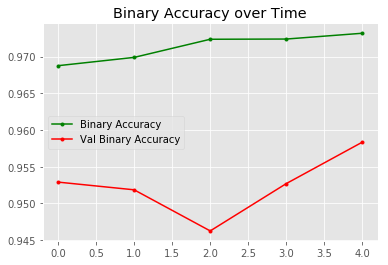

In [7]:
plt.plot(model.history.history['binary_accuracy'], 'g.-', label = 'Binary Accuracy')
plt.plot(model.history.history['val_binary_accuracy'], 'r.-', label = 'Val Binary Accuracy')
plt.legend()
plt.title('Binary Accuracy over Time')
plt.show()

## James' Model

In [60]:
model = keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(1)
])
model.compile(optimizer = SGD(lr = 1e-6), 
              metrics = [keras.metrics.BinaryAccuracy(), 
                   keras.metrics.Precision(), 
                   keras.metrics.Recall()],
              loss = keras.losses.BinaryCrossentropy())

In [61]:
model_fit = model.fit(train_imgs,
                      epochs = 1,
                      validation_data = val_imgs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 200 steps
 411/1000 [===========>..................] - ETA: 3:40 - loss: 2.1835 - binary_accuracy: 0.5003 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00

KeyboardInterrupt: 

## Need 2.4.1

In [14]:
tf.keras.preprocessing.image_dataset_from_directory(
    directory="data",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

AttributeError: module 'tensorflow_core.keras.preprocessing' has no attribute 'image_dataset_from_directory'

## Path attempts, no need currently

In [ ]:
# Save images as numpy array
for dsplit in ('train', 'valid', 'test'):
    imgs_to_numpy(dsplit=dsplit)

In [ ]:
# df['path'].tail()
img_path = 'train/fake/73ILM40K3Z.jpg'
img_idx = 99999
img = plt.imread(DATADIR / img_path)
X[img_idx, :, :, :] = img / 255.0

In [34]:
dsplit = 'train'

# Check that the split exists
if dsplit not in ('train', 'valid', 'test'):
    raise Exception('dsplit must be `train`, `test`, or `valid`')

# Load labeled dataframes
PATHDIR = Path('data')
DATADIR = Path('data/') / 'real_vs_fake' / 'real-vs-fake'
SAVEPATH = PATHDIR / 'data_array'

df = pd.read_csv(PATHDIR / f'{dsplit}.csv', header=0).drop(
    ['original_path', 'Unnamed: 0', 'label_str'], axis=1)

# Create containers for the image data
n = df.shape[0]
X = np.empty(shape=(n, 256, 256, 3))
y = df['label'].to_numpy()[np.newaxis].reshape(-1, 1)

In [ ]:
# X[img_idx, :, :, :]
with open(SAVEPATH / f'X_{dsplit}.npy', 'wb') as file:
    np.save(file, X)

In [ ]:
with open(SAVEPATH / f'y_{dsplit}.npy', 'wb') as file:
        np.save(file, y)

In [ ]:
X = np.random.randn(n, 256, 256, 3)

In [ ]:
# Load in the training data
PATHTRAIN = Path('data') / 'data_array'
with tf.device('/device:GPU:0'):
    with open(PATHTRAIN / 'X_train.npy', 'rb') as f:
        X = np.load(f)
    
    with open(PATHTRAIN / 'y_train.npy', 'rb') as f:
        y = np.load(f)
print(X.shape)
print(y.shape)